In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

%matplotlib inline

c:\users\yunseob hwang\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


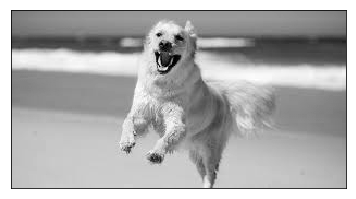

In [2]:
import scipy as sc
from scipy.ndimage import imread

imbw = sc.misc.imread('C:/Users/Yunseob Hwang/Downloads/images.jfif', 'L')
plt.imshow(imbw, 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

(164, 308)
row x col = 164 x 308 = 50512 = n


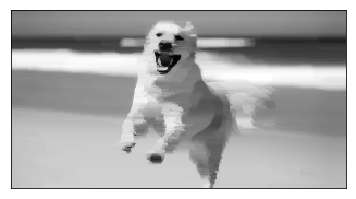

In [5]:
print(imbw.shape)

row, col = imbw.shape
n = row * col

imbws = imbw.reshape(-1,1)

beta = 1200

x = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm(x[1:n] - x[0:n-1], 1))  # x2 - x1, .... xn - xn-1
const = [cvx.norm(x-imbws, 2) <= beta]
prob = cvx.Problem(obj, const).solve()

imbwr = x.value.reshape(row, col)

print("row x col = {} x {} = {} = n".format(row, col, n))

plt.imshow(imbwr, 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

row x col = 164 x 308 = 50512 = n


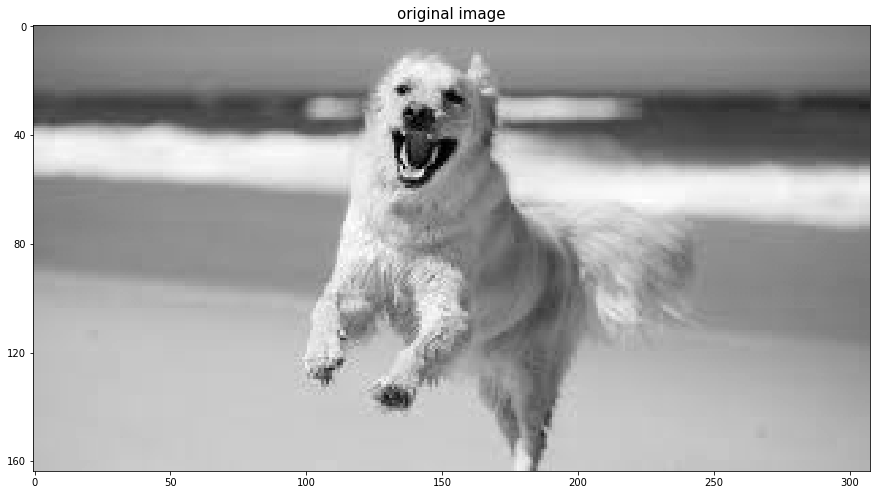

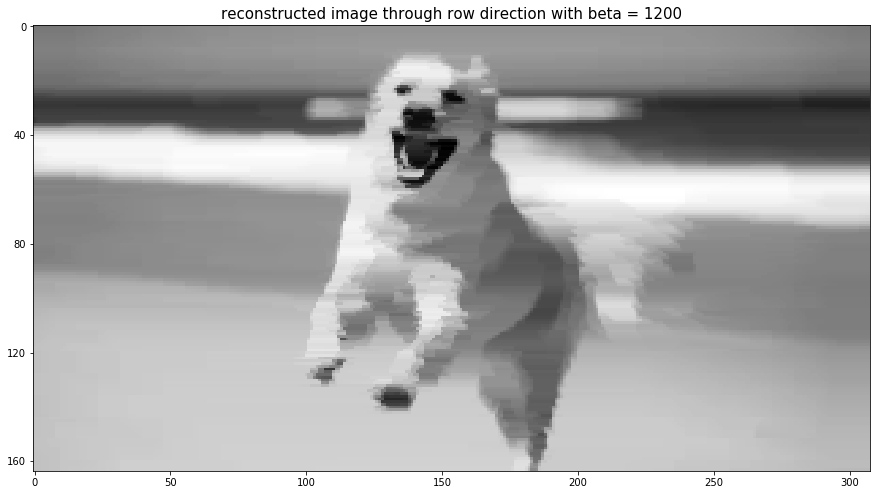

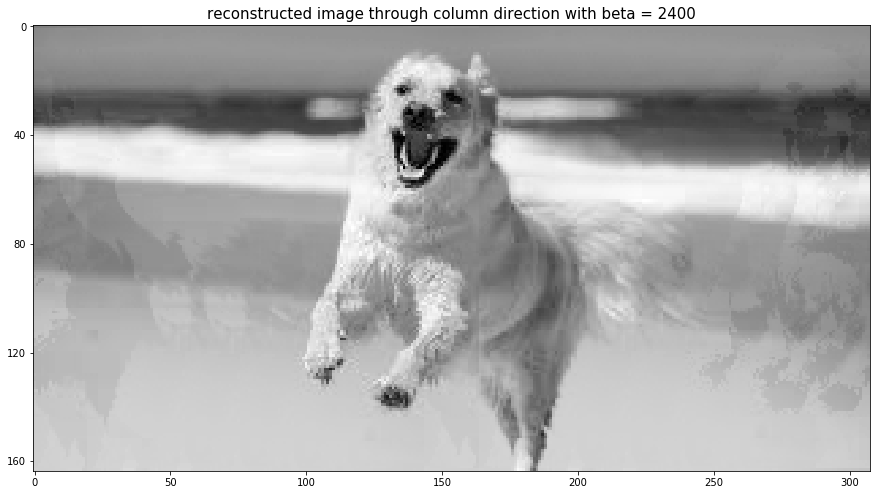

In [4]:
row, col = imbw.shape
n = row * col

imbws = imbw.reshape(-1,1)

beta1 = 2400

x = cvx.Variable(n)
obj = cvx.Minimize(cvx.norm(x[row:n] - x[0:n-row], 1)) # xr+1 - x1, ...., xn - xn-r
const = [cvx.norm(x-imbws, 2) <= beta1]
prob = cvx.Problem(obj, const).solve()

imbwc = x.value.reshape(row, col)

print("row x col = {} x {} = {} = n".format(row, col, n))

plt.figure(figsize=(15, 10))
plt.title("original image", fontsize=15)
plt.imshow(imbw, 'gray')
plt.xticks(np.arange(0, col, step=50))
plt.yticks(np.arange(0, row, step=40))
plt.show()

plt.figure(figsize=(15, 10))
plt.title("reconstructed image through row direction with beta = 1200", fontsize=15)
plt.imshow(imbwr, 'gray')
plt.xticks(np.arange(0, col, step=50))
plt.yticks(np.arange(0, row, step=40))
plt.show()

plt.figure(figsize=(15, 10))
plt.title("reconstructed image through column direction with beta = 2400", fontsize=15)
plt.imshow(imbwc, 'gray')
plt.xticks(np.arange(0, col, step=50))
plt.yticks(np.arange(0, row, step=40))
plt.show()